<center>
<img src="../../img/beeline_data_school_logo.png">
# Школа данных "Билайн"
#### Интенсивный курс по изучению машинного обучения и анализа данных
<img src="../../img/beeline_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

## Практическое задание. Визуальный анализ данных пассажиров "Титаника"

**<a href="https://www.kaggle.com/c/titanic">Соревнование</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [24]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
from scipy import stats
%pylab inline
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


**Считываем обучающую выборку.**

In [3]:
train_df = pd.read_csv("data/titanic_train.csv") 

In [4]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lovell, Mr. John Hall (""Henry"")",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Заполним пропуски медианными значениями**

In [6]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')

**Постройте попарные зависимости признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001D01D6D8>,
      dtype=object)

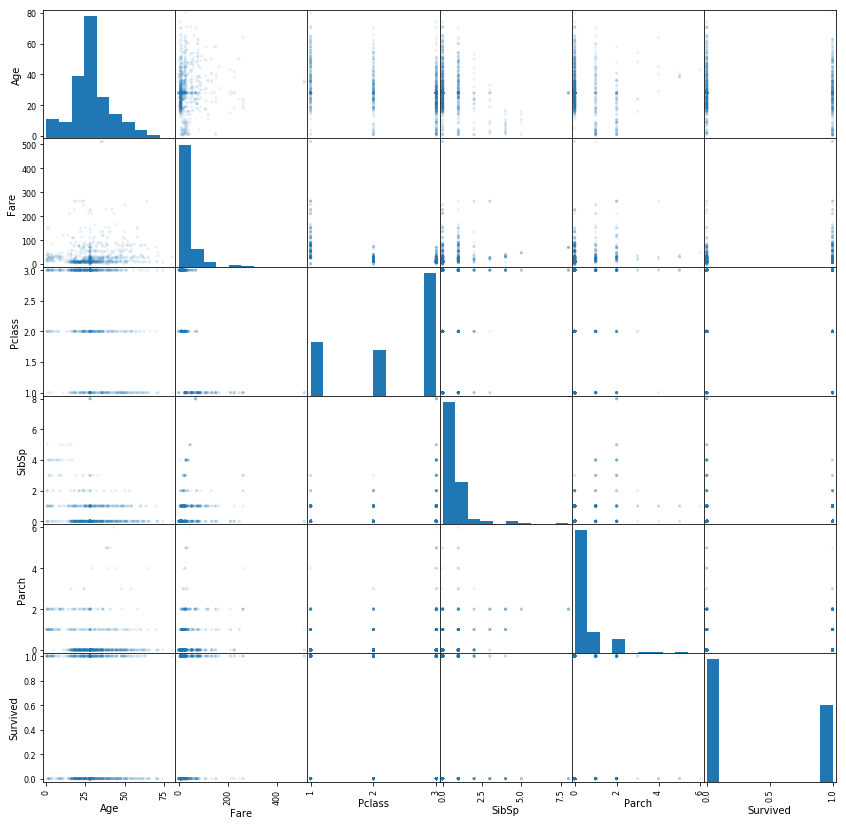

In [68]:
data_n = pd.DataFrame({'Age': train_df['Age'],
                            'Fare': train_df['Fare'],
                            'Pclass': train_df['Pclass'],
                            'Sex': train_df['Sex'],
                            'SibSp': train_df['SibSp'],
                            'Parch': train_df['Parch'],
                            'Embarked': train_df['Embarked'],
                            'Survived': train_df['Survived']})
scatter_matrix(data_n, alpha=0.1, figsize=(14.2, 14.2))

# sns.pairplot(data_n)

**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

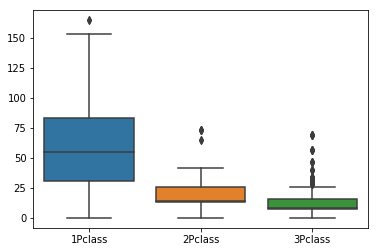

In [38]:
Fare_no_out = list(map(lambda x: train_df[(np.abs(stats.zscore(train_df['Fare'])) < 3) & (train_df['Pclass'] == x)], np.sort(train_df['Pclass'].unique())))
Fare_no_out = pd.DataFrame({'1Pclass': Fare_no_out[0]['Fare'],
                           '2Pclass': Fare_no_out[1]['Fare'],
                           '3Pclass': Fare_no_out[2]['Fare']})
sns.boxplot(data=Fare_no_out)

**Такой boxplot получается не очень красивым из-за выбросов.** 

**Опционально: создайте признак `Fare_no_out` - стоимости без выбросов, в котором исключаются стоимости, отличающиеся от средней по классу более чем на 3 стандартных отклонения. Важно: Надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости.**

In [ ]:
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']
fare_pclass1_no_out = # Ваш код здесь
fare_pclass2_no_out = # Ваш код здесь
fare_pclass3_no_out = # Ваш код здесь
train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out).append(fare_pclass3_no_out)
sns.boxplot  # Ваш код здесь

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.**

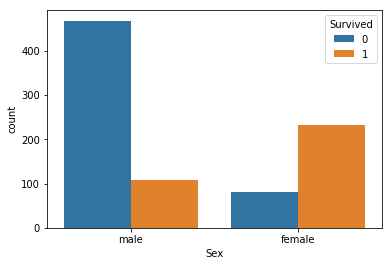

In [61]:
sns.countplot(x=train_df['Sex'], hue=train_df['Survived'], data=train_df)

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.**

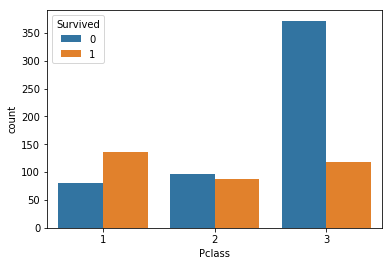

In [62]:
sns.countplot(x=train_df['Pclass'], hue=train_df['Survived'], data=train_df)

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали.**

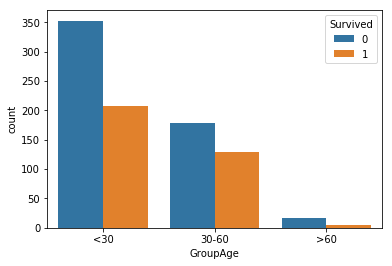

In [75]:
train_df.loc[train_df['Age'] < 30, 'GroupAge'] = "<30"
train_df.loc[(train_df['Age'] >= 30) & (train_df['Age'] <= 60), 'GroupAge'] = "30-60"
train_df.loc[(train_df['Age'] > 60), 'GroupAge'] = ">60"

sns.countplot(x=train_df['GroupAge'], hue=train_df['Survived'], data=train_df)